In [1]:
# @title Mount Drive và import pandas

import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

KeyboardInterrupt: 

In [ ]:
# @title Đọc final_SQLi.csv vào DataFrameDF và xóa những cột thừa


df = pd.read_csv("/content/drive/MyDrive/Machine_Log_Analysis/Dataset/Final_Csv/final_SQLi.csv")

df = df.dropna()
del df['Unnamed: 0']

<ipython-input-2-7610ca92b280>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Machine_Log_Analysis/Dataset/Final_Csv/final_SQLi.csv")


In [ ]:
# @title Chuẩn bị các tập dữ liệu huấn luyện và thử nghiệm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Tạo một DataFrame X_df chỉ chứa các thuộc tính (Biến huấn luyện)
X = list(df.columns[3:])
X_df = df[X]

# Tạo một DataFrame Y_df chứa các label (Biến mục tiêu)
Y_df = df['label']

#Tách các tập huấn luyện thành tập thử nghiệm với kích thước 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=0)

Accuracy of Random Forest classifier on training set of SQLi: 0.98
Accuracy of Random Forest classifier on test set of SQLi: 0.98

Accuracy: 0.975609756097561
Precision: 0.9669421487603306
Recall: 0.9654527450764661
F1_score 0.9661968729354767


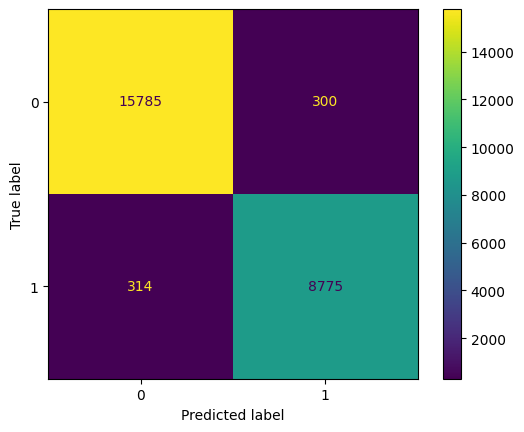

In [ ]:
# @title Huấn luyện mô hình và in ra kết quả

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score # Import precision_score, recall_score, and f1_score
from sklearn.metrics import ConfusionMatrixDisplay #import the ConfusionMatrixDisplay class
#Tạo model RandomForest RF và bắt đầu huấn luyện
RF = RandomForestClassifier(max_depth=19, n_estimators=124)
RF.fit(X_train,Y_train)

print('Accuracy of Random Forest classifier on training set of SQLi: {:.2f}'
     .format(RF.score(X_train, Y_train)))
print('Accuracy of Random Forest classifier on test set of SQLi: {:.2f}'
     .format(RF.score(X_test, Y_test)))

#In ra kết quả huấn luyện
print()
Y_pred = RF.predict(X_test)

# Create the confusion matrix
# Changed y_test to Y_test to match the variable name used in train_test_split
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
metrics.accuracy_score(Y_test, Y_pred)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred) # Use precision_score to calculate precision
recall = recall_score(Y_test, Y_pred) # Use recall_score to calculate recall
F1_score = f1_score(Y_test,Y_pred) # Use f1_score to calculate F1 score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score",F1_score);

In [ ]:
# @title Lưu mô hình đã huấn luyện

import pickle
filename = '/content/drive/MyDrive/Machine_Log_Analysis/Model/Model_Results/SQLi.sav'
pickle.dump(RF, open(filename, 'wb'))